# 1.Importing Data

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [ ]:
# Read in the edgelist file from csv
london_flows = pd.read_csv("/content/drive/MyDrive/US_Wendi_Li/london_flows.csv")

# Print data (first five rows)
london_flows.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [ ]:
london_flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [ ]:
# drop Battersea Park station
#london_clean = london_flows[london_flows['station_origin'] != 'Battersea Park']
#london_clean = london_clean[london_clean['station_destination'] != 'Battersea Park']

In [ ]:
# Test!
#a = london_flows[london_flows['station_origin']=='Abbey Road']
a = london_flows[(london_flows['station_origin'] == 'Abbey Road') & (london_flows['station_destination'] == 'Canning Town')]
b = london_flows[(london_flows['station_origin'] == 'Canning Town') & (london_flows['station_destination'] == 'Abbey Road')]

merged_df = pd.concat([a, b], ignore_index=True)
merged_df

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Canning Town,37,599,15428,2228.923167
1,Canning Town,Abbey Road,5,21125,345,2228.923167


# 2. Creating topological network

In [ ]:
# 无向图,纯拓扑网络
G_topological = nx.from_pandas_edgelist(london_flows, 'station_origin', 'station_destination', create_using=nx.Graph())
#G = nx.from_pandas_edgelist(london_clean, 'station_origin', 'station_destination')

In [ ]:
print(f'Number of connected components:{nx.number_connected_components(G_topological)}')

Number of connected components:1


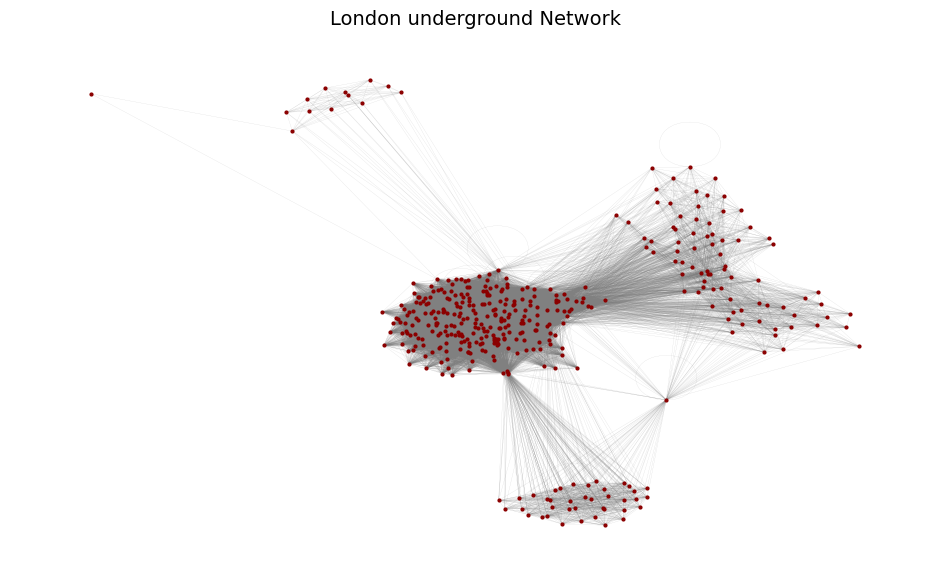

In [ ]:
pos = nx.spring_layout(G_topological)

fig, ax = plt.subplots(figsize=(12,7))

# plot largest connected components
nx.draw_networkx_edges(G_topological,
                       pos=pos,
                       edge_color='gray',
                       width=0.1,
                       alpha=0.5,
                       ax=ax
                      )
nx.draw_networkx_nodes(G_topological,
                       pos=pos,
                       node_color='darkred',
                       node_size=4,
                       ax=ax
                      )
ax.axis('off')
ax.set_title('London underground Network', fontsize=14)

# plot the degree distribution


plt.show()

# I.1 Centrality Measures
G = G_topological.copy()

In [ ]:
G = G_topological.copy()

In [ ]:
nx.diameter(G)

3

## Degree Centrality

In [ ]:
# Degree Centrality
degree=nx.degree(G)
nx.set_node_attributes(G,dict(degree),'Degree')

# normalised
degree_normalised =nx.degree_centrality(G)
nx.set_node_attributes(G,degree_normalised,'Degree_Normalised')

list(G.nodes(data = True))[0]

('Abbey Road', {'Degree': 34, 'Degree_Normalised': 0.08542713567839195})

In [ ]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['Degree'] = pd.Series(nx.get_node_attributes(G, 'Degree'))
df['Degree_Normalised'] = pd.Series(nx.get_node_attributes(G, 'Degree_Normalised'))
df_sorted = df.sort_values(["Degree"], ascending=False)
df_sorted.to_excel('degree.xlsx')
df_sorted[0:10]

,Degree,Degree_Normalised
Stratford,367,0.922111
Highbury & Islington,321,0.806533
Whitechapel,311,0.781407
West Brompton,309,0.776382
Canada Water,307,0.771357
Canary Wharf,307,0.771357
Liverpool Street,306,0.768844
Bank and Monument,305,0.766332
Richmond,305,0.766332
Canning Town,304,0.763819


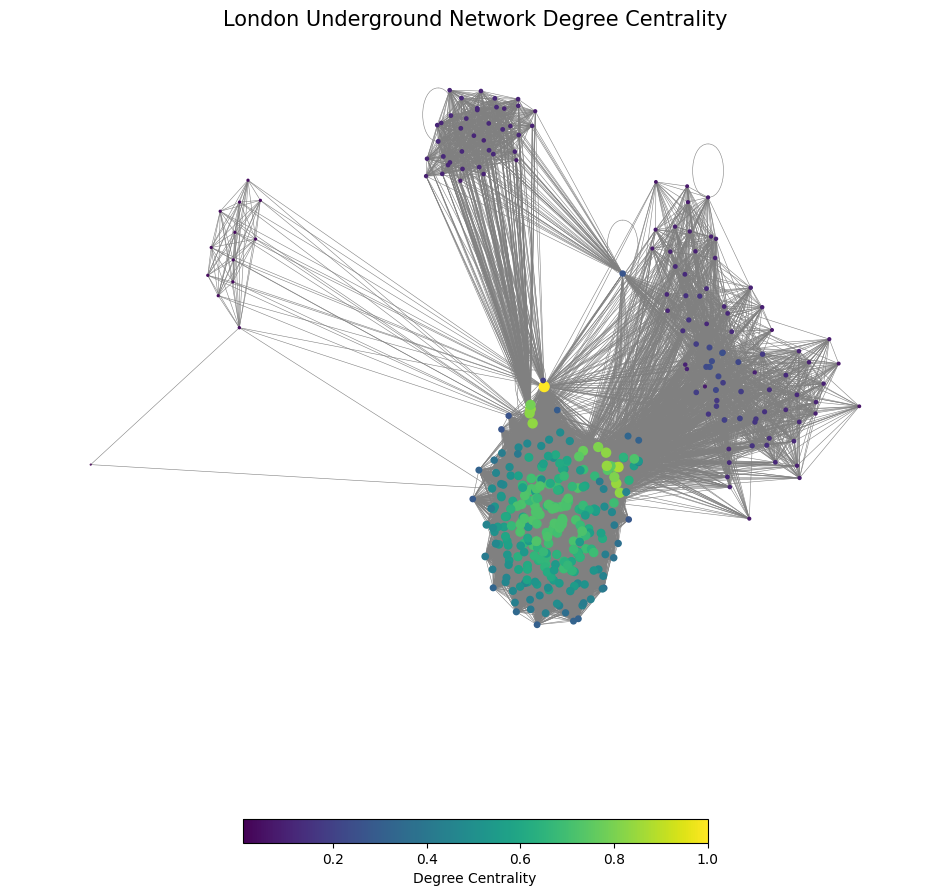

In [ ]:
pos = nx.spring_layout(G)
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['Degree_Normalised']) for i in G.nodes(data=True)]
#node_color = 'blue'
deg_color=[(i[1]['Degree_Normalised']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['Degree_Normalised']/(max(degree_values)))*50 for i in G.nodes(data=True)]
#node_color = plt.cm.plasma(deg_color)
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray',
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,#
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Underground Network Degree Centrality",fontsize=15)
plt.savefig('degree.png', dpi=300, bbox_inches='tight')
plt.show()


## Closeness Centrality

In [ ]:
#topological closeness centrality
close=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,close,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted.to_excel('close.xlsx')
df_sorted[0:10]

,closeness_t
Stratford,0.927739
Highbury & Islington,0.836134
Whitechapel,0.820619
West Brompton,0.817248
Canada Water,0.813906
Richmond,0.810591
Canary Wharf,0.810591
Bank and Monument,0.810591
Liverpool Street,0.808943
Canning Town,0.808943


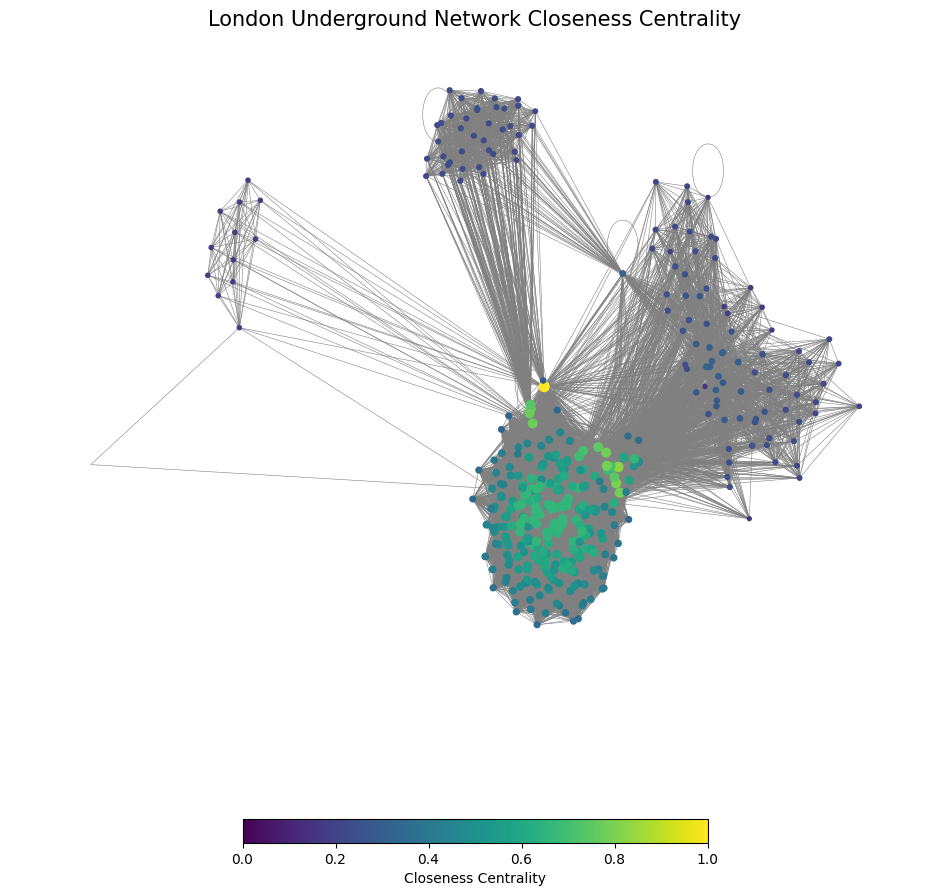

In [ ]:
# Set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray',
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Underground Network Closeness Centrality",fontsize=15)
plt.savefig('close.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
list(G.nodes(data = True))[0]

('Abbey Road',
 {'Degree': 34,
  'Degree_Normalised': 0.08542713567839195,
  'closeness_t': 0.5155440414507773})

## Betweenness Centrality

In [ ]:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted.to_excel('Betweenness.xlsx')
df_sorted[0:10]

,betweenness_t
Stratford,7785.967073
Liverpool Street,2710.377160
Canary Wharf,2208.627931
Bank and Monument,2208.627931
Canning Town,2192.848026
West Ham,1939.641831
Highbury & Islington,1818.904025
Whitechapel,1554.965946
Canada Water,1413.977663
Shadwell,1348.588902


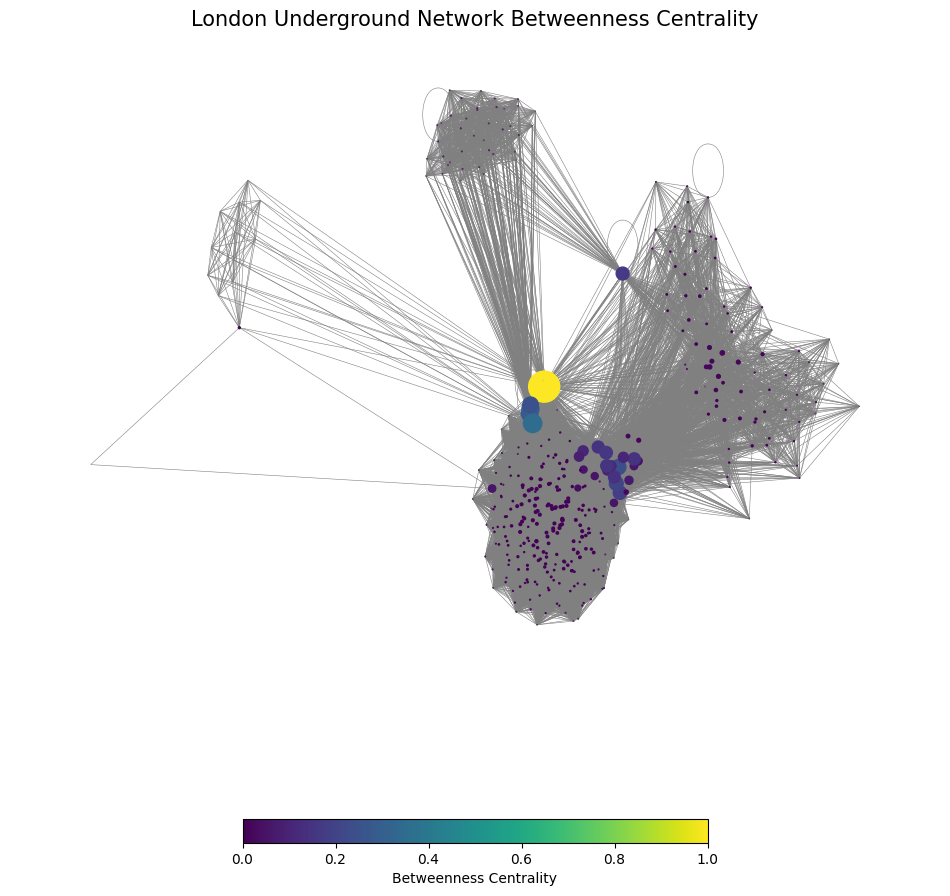

In [ ]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*500 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Underground Network Betweenness Centrality",fontsize=15)
plt.savefig('betweenness.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
list(G.edges(data = True))[0:1]

[('Abbey Road', 'Bank and Monument', {})]

In [ ]:
list(G.nodes(data = True))[0:1]

[('Abbey Road',
  {'Degree': 34,
   'Degree_Normalised': 0.08542713567839195,
   'closeness_t': 0.5155440414507773,
   'betweenness_t': 0.6283928089661619})]

# I.3 Node Removal

Clustering coefficient & average shortest path

## Measure a: Average Clustering Coefficient

A: G1=G_topological.copy()

B: G2=G_topological.copy()

In [ ]:
G1=G_topological.copy()
print(G1.number_of_nodes())
print(G1.number_of_edges())

399
31718


### Three centralities of strategy A

In [ ]:
import networkx as nx
import pandas as pd
from operator import itemgetter

# Assuming G1 is your networkx graph and degree_normalised is your dictionary of normalized degree values for the nodes
G1=G_topological.copy()

def calculate_clustering_coefficients(G, sorted_nodes):
    # Calculate the original average clustering coefficient
    c = nx.clustering(G)
    c_avg = sum(c.values()) / len(c)

    # Initialize a list to store the results
    results = []

    # Add the original average clustering coefficient to the results list
    results.append(('original', c_avg))

    # Iteratively remove nodes from the sorted list
    for idx, node in enumerate(sorted_nodes):
        G.remove_node(node)

        # Calculate the new average clustering coefficient
        c = nx.clustering(G)
        c_avg = sum(c.values()) / len(c)

        # Add the new average clustering coefficient to the results list
        results.append((f'iteration_{idx + 1}', c_avg))

    return results

# Define your three different sorted_ten lists
sorted_ten_1 = [e for e, v in sorted(degree_normalised.items(), key=itemgetter(1), reverse=True)[:10]]
sorted_ten_2 = [e for e, v in sorted(close.items(), key=itemgetter(1), reverse=True)[:10]]
sorted_ten_3 = [e for e, v in sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)[:10]]

# Call the function for each sorted_ten list and create DataFrames for each
G1_copy1 = G1.copy()
results_1 = calculate_clustering_coefficients(G1_copy1, sorted_ten_1)
df1 = pd.DataFrame(results_1, columns=['iteration', 'DegreeA'])

G1_copy2 = G1.copy()
results_2 = calculate_clustering_coefficients(G1_copy2, sorted_ten_2)
df2 = pd.DataFrame(results_2, columns=['iteration', 'ClosenessA'])

G1_copy3 = G1.copy()
results_3 = calculate_clustering_coefficients(G1_copy3, sorted_ten_3)
df3 = pd.DataFrame(results_3, columns=['iteration', 'BetweennessA'])

# Merge the DataFrames
ClusteringA = df1.merge(df2, on='iteration').merge(df3, on='iteration')
ClusteringA.to_excel('ClusteringA.xlsx')
# Display the merged DataFrame
print(ClusteringA)


       iteration   DegreeA  ClosenessA  BetweennessA
0       original  0.846141    0.846141      0.846141
1    iteration_1  0.845247    0.845247      0.845247
2    iteration_2  0.844518    0.844518      0.844742
3    iteration_3  0.843820    0.843820      0.844201
4    iteration_4  0.843457    0.843457      0.843630
5    iteration_5  0.842905    0.842637      0.843033
6    iteration_6  0.842080    0.842080      0.842841
7    iteration_7  0.841604    0.841493      0.842107
8    iteration_8  0.841012    0.841015      0.841400
9    iteration_9  0.840537    0.840399      0.840572
10  iteration_10  0.839916    0.839916      0.840972


### Three centralities of strategy B

**Degree Centrality**

In [ ]:
G2=G_topological.copy()

# Initialize a list to store the results

c = nx.clustering(G2)
c_avg = sum(c.values()) / len(c)
results = []
results.append(('original', c_avg)) #把最开始的clustering加进去
removed_nodes = []

# Repeat the process ten times
for i in range(10):
    # Calculate degree centrality
    degree_clusB = nx.degree_centrality(G2) #计算中心性

    # Find the node with the largest degree centrality
    max_node = max(degree_clusB, key=degree_clusB.get)#识别最大的

    # Remove the node with the largest degree centrality from the graph
    G2.remove_node(max_node)#移除最大的
    removed_nodes.append((i + 1, max_node, degree_clusB[max_node]))
    # Calculate the clustering coefficient
    c = nx.clustering(G2)
    c_avg = sum(c.values()) / len(c)#移除后计算

    # Append the average clustering coefficient to the results list
    results.append(('iteration_' + str(i + 1), c_avg))

# Create a pandas DataFrame from the results list
df_degree_clusB = pd.DataFrame(results, columns=['iteration', 'DegreeB'])
df_removed_nodes = pd.DataFrame(removed_nodes, columns=['iteration', 'Clustering Degree B','degree_centrality'])
df_removed_nodes.to_excel('Clus_Degree_removal.xlsx')
# Display the DataFrame
print(df_degree_clusB)

       iteration   DegreeB
0       original  0.846141
1    iteration_1  0.845247
2    iteration_2  0.844518
3    iteration_3  0.843820
4    iteration_4  0.843457
5    iteration_5  0.842905
6    iteration_6  0.842080
7    iteration_7  0.841604
8    iteration_8  0.841012
9    iteration_9  0.840537
10  iteration_10  0.839916


**Closeness Centrality**

In [ ]:
G2=G_topological.copy()

c = nx.clustering(G2)
c_avg = sum(c.values()) / len(c)
results = []
results.append(('original', c_avg))
removed_nodes = []
# Repeat the process ten times
for i in range(10):
    # Calculate degree centrality
    closeness_clusB = nx.closeness_centrality(G2)

    # Find the node with the largest degree centrality
    max_node = max(closeness_clusB, key=closeness_clusB.get)

    # Remove the node with the largest degree centrality from the graph
    G2.remove_node(max_node)
    removed_nodes.append((i + 1, max_node, closeness_clusB[max_node]))

    # Calculate the clustering coefficient
    c = nx.clustering(G2)
    c_avg = sum(c.values()) / len(c)

    # Append the average clustering coefficient to the results list
    results.append(('iteration_' + str(i + 1), c_avg))

# Create a pandas DataFrame from the results list
df_closeness_clusB = pd.DataFrame(results, columns=['iteration', 'ClosenessB'])

df_removed_nodes_1 = pd.DataFrame(removed_nodes, columns=['iteration', 'Clustering Closeness B','closeness_centrality'])
df_removed_nodes_1.to_excel('Clus_Closeness_removal.xlsx')
# Display the DataFrame
print(df_closeness_clusB)
df_removed_nodes_1

       iteration  ClosenessB
0       original    0.846141
1    iteration_1    0.845247
2    iteration_2    0.844518
3    iteration_3    0.843820
4    iteration_4    0.843457
5    iteration_5    0.842637
6    iteration_6    0.842080
7    iteration_7    0.841493
8    iteration_8    0.841015
9    iteration_9    0.840399
10  iteration_10    0.839916


,iteration,Clustering Closeness B,closeness_centrality
0,1,Stratford,0.927739
1,2,Highbury & Islington,0.835789
2,3,Whitechapel,0.819876
3,4,West Brompton,0.816116
4,5,Canada Water,0.812371
5,6,Bank and Monument,0.808642
6,7,Canary Wharf,0.808247
7,8,Richmond,0.807851
8,9,Canning Town,0.805785
9,10,Liverpool Street,0.802062


**Betweenness Centrality**

In [ ]:
G2=G_topological.copy()

c = nx.clustering(G2)
c_avg = sum(c.values()) / len(c)
results = []
results.append(('original', c_avg))
removed_nodes = []
# Repeat the process ten times
for i in range(10):
    # Calculate degree centrality
    betweenness_clusB = nx.betweenness_centrality(G2, normalized=False)

    # Find the node with the largest degree centrality
    max_node = max(betweenness_clusB, key=betweenness_clusB.get)

    # Remove the node with the largest degree centrality from the graph
    G2.remove_node(max_node)
    removed_nodes.append((i + 1, max_node, betweenness_clusB[max_node]))

    # Calculate the clustering coefficient
    c = nx.clustering(G2)
    c_avg = sum(c.values()) / len(c)

    # Append the average clustering coefficient to the results list
    results.append(('iteration_' + str(i + 1), c_avg))

# Create a pandas DataFrame from the results list
df_betweenness_clusB = pd.DataFrame(results, columns=['iteration', 'BetweennessB'])
df_removed_nodes_2 = pd.DataFrame(removed_nodes, columns=['iteration', 'Clustering Betweenness B','betweenness_centrality'])
df_removed_nodes_2.to_excel('Clus_Betweenness_removal.xlsx')
# Display the DataFrame
print(df_betweenness_clusB)

       iteration  BetweennessB
0       original      0.846141
1    iteration_1      0.845247
2    iteration_2      0.844742
3    iteration_3      0.842781
4    iteration_4      0.842236
5    iteration_5      0.841662
6    iteration_6      0.841062
7    iteration_7      0.840870
8    iteration_8      0.841341
9    iteration_9      0.840562
10  iteration_10      0.839827


In [ ]:
ClusteringB = pd.concat([df_degree_clusB,df_closeness_clusB, df_betweenness_clusB], axis=1)
# Remove duplicate columns by selecting only the first occurrence of each column
ClusteringB = ClusteringB.loc[:, ~ClusteringB.columns.duplicated()]
# Print the merged DataFrame
ClusteringB.to_excel('ClusteringB.xlsx')
print(ClusteringB)

       iteration   DegreeB  ClosenessB  BetweennessB
0       original  0.846141    0.846141      0.846141
1    iteration_1  0.845247    0.845247      0.845247
2    iteration_2  0.844518    0.844518      0.844742
3    iteration_3  0.843820    0.843820      0.842781
4    iteration_4  0.843457    0.843457      0.842236
5    iteration_5  0.842905    0.842637      0.841662
6    iteration_6  0.842080    0.842080      0.841062
7    iteration_7  0.841604    0.841493      0.840870
8    iteration_8  0.841012    0.841015      0.841341
9    iteration_9  0.840537    0.840399      0.840562
10  iteration_10  0.839916    0.839916      0.839827


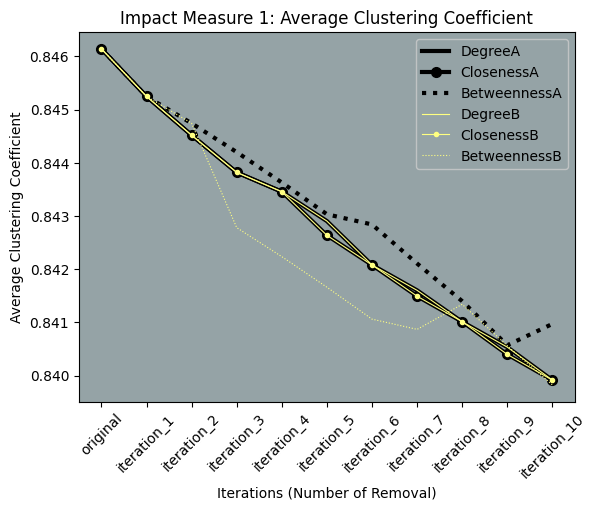

In [ ]:
import matplotlib.pyplot as plt

line_styles = ['-', '-', ':']
markerA = ['','o','']
markerB = ['','o','']
colors_A = ['black', 'black', 'black']
colors_B = ['#ffff81', '#ffff81', '#ffff81']
line_widthsA = [3, 3, 3]
line_widthsB = [0.8, 0.8, 0.8]

fig, ax = plt.subplots()
#ax.set_facecolor('#758da3')

ax.set_facecolor('#95a3a6')
# Plot the lines for ClusteringA
for i, col in enumerate(['DegreeA', 'ClosenessA', 'BetweennessA']):
    ax.plot(ClusteringA['iteration'], ClusteringA[col], linestyle=line_styles[i], color=colors_A[i], linewidth=line_widthsA[i], label=col,marker=markerA[i],markersize=7)

# Plot the lines for ClusteringB
for i, col in enumerate(['DegreeB', 'ClosenessB', 'BetweennessB']):
    ax.plot(ClusteringB['iteration'], ClusteringB[col], linestyle=line_styles[i], color=colors_B[i], linewidth=line_widthsB[i], label=col,marker=markerB[i],markersize=3)

ax.set_xlabel("Iterations (Number of Removal)")
ax.set_ylabel("Average Clustering Coefficient")
ax.set_title("Impact Measure 1: Average Clustering Coefficient")

plt.xticks(rotation=45)

legend = ax.legend()
legend.get_frame().set_facecolor('#95a3a6')

plt.savefig('Clustering.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
ClusteringA.head(2)

,iteration,DegreeA,ClosenessA,BetweennessA
0,original,0.846141,0.846141,0.846141
1,iteration_1,0.845247,0.845247,0.845247


In [ ]:
ClusteringB.head(2)

,iteration,DegreeB,ClosenessB,BetweennessB
0,original,0.846141,0.846141,0.846141
1,iteration_1,0.845247,0.845247,0.845247


In [ ]:
rate_of_fall_column1 = (ClusteringA['DegreeA'].iloc[-1] - ClusteringA['DegreeA'].iloc[0]) / ClusteringA['DegreeA'].iloc[0]
rate_of_fall_column2 = (ClusteringA['ClosenessA'].iloc[-1] - ClusteringA['ClosenessA'].iloc[0]) / ClusteringA['ClosenessA'].iloc[0]
rate_of_fall_column3 = (ClusteringA['BetweennessA'].iloc[-1] - ClusteringA['BetweennessA'].iloc[0]) / ClusteringA['BetweennessA'].iloc[0]

rate_of_fall_column4 = (ClusteringB['DegreeB'].iloc[-1] - ClusteringB['DegreeB'].iloc[0]) / ClusteringB['DegreeB'].iloc[0]
rate_of_fall_column5 = (ClusteringB['ClosenessB'].iloc[-1] - ClusteringB['ClosenessB'].iloc[0]) / ClusteringB['ClosenessB'].iloc[0]
rate_of_fall_column6 = (ClusteringB['BetweennessB'].iloc[-1] - ClusteringB['BetweennessB'].iloc[0]) / ClusteringB['BetweennessB'].iloc[0]

In [ ]:
clustering_rate = (rate_of_fall_column1 + rate_of_fall_column2 + rate_of_fall_column3 + rate_of_fall_column4 + rate_of_fall_column5 + rate_of_fall_column6) / 6
clustering_rate

-0.007166374708984083

## Measure b: Global Efficiency

G3=G_topological.copy()

G4=G_topological.copy()

### Three centralities of strategy A

In [ ]:
G3=G_topological.copy()
print(G3.number_of_nodes())
print(G3.number_of_edges())
efficiencyA = nx.global_efficiency(G3)
efficiencyA

399
31718


0.697696922372896

In [ ]:
G3=G_topological.copy()

def calculate_clustering_coefficients(G, sorted_nodes):
    # Calculate the original average clustering coefficient
    efficiency = nx.global_efficiency(G)

    # Initialize a list to store the results
    results = []

    # Add the original average clustering coefficient to the results list
    results.append(('original',efficiency))

    # Iteratively remove nodes from the sorted list
    for idx, node in enumerate(sorted_nodes):
        G.remove_node(node)

        # Calculate the new average clustering coefficient
        efficiency = nx.global_efficiency(G)

        # Add the new average clustering coefficient to the results list
        results.append((f'iteration_{idx + 1}', efficiency))

    return results

# Define your three different sorted_ten lists
sorted_ten_1 = [e for e, v in sorted(degree_normalised.items(), key=itemgetter(1), reverse=True)[:10]]
sorted_ten_2 = [e for e, v in sorted(close.items(), key=itemgetter(1), reverse=True)[:10]]
sorted_ten_3 = [e for e, v in sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)[:10]]

# Call the function for each sorted_ten list and create DataFrames for each
G3_copy1 = G3.copy()
results_1 = calculate_clustering_coefficients(G3_copy1, sorted_ten_1)
df1 = pd.DataFrame(results_1, columns=['iteration', 'DegreeA'])

G3_copy2 = G3.copy()
results_2 = calculate_clustering_coefficients(G3_copy2, sorted_ten_2)
df2 = pd.DataFrame(results_2, columns=['iteration', 'ClosenessA'])

G3_copy3 = G3.copy()
results_3 = calculate_clustering_coefficients(G3_copy3, sorted_ten_3)
df3 = pd.DataFrame(results_3, columns=['iteration', 'BetweennessA'])

# Merge the DataFrames
EfficiencyA = df1.merge(df2, on='iteration').merge(df3, on='iteration')
EfficiencyA.to_excel('EfficiencyA.xlsx')
# Display the merged DataFrame
print(EfficiencyA)

       iteration   DegreeA  ClosenessA  BetweennessA
0       original  0.697697    0.697697      0.697697
1    iteration_1  0.692206    0.692206      0.692206
2    iteration_2  0.691126    0.691126      0.681826
3    iteration_3  0.690118    0.690118      0.680833
4    iteration_4  0.689117    0.689117      0.679750
5    iteration_5  0.688136    0.686198      0.676786
6    iteration_6  0.685201    0.685201      0.656498
7    iteration_7  0.674635    0.684113      0.655264
8    iteration_8  0.673515    0.683072      0.654088
9    iteration_9  0.672438    0.680043      0.650970
10  iteration_10  0.669381    0.669381      0.587628


### Three centralities of strategy B

In [ ]:
G4=G_topological.copy()
print(G4.number_of_nodes())
print(G4.number_of_edges())
efficiencyA = nx.global_efficiency(G4)
efficiencyA

399
31718


0.697696922372896

In [ ]:
# Test!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
values_sorted = sorted(close.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:10]]

#去掉第一个between的efficiency
G4.remove_node(sorted_ten[0])
print(G4.number_of_nodes())
print(G4.number_of_edges())
efficiencyA = nx.global_efficiency(G4)
print(efficiencyA)

# 重新计算，然后去掉最高的
degree_effi_B = nx.closeness_centrality(G4)
values_sorted = sorted(degree_effi_B.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:10]]

G4.remove_node(sorted_ten[0])
print(G4.number_of_nodes())
print(G4.number_of_edges())
efficiencyA = nx.global_efficiency(G4)
print(efficiencyA)

# 重新计算，然后去掉最高的
degree_effi_B = nx.degree_centrality(G4)
values_sorted = sorted(degree_effi_B.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:10]]

G4.remove_node(sorted_ten[0])
print(G4.number_of_nodes())
print(G4.number_of_edges())
efficiencyA = nx.global_efficiency(G4)
print(efficiencyA)

398
31351
0.6922057812149586
397
31031
0.6911262074989025
396
30722
0.6901184844221805


**Degree Centrality**

In [ ]:
G4=G_topological.copy()

# Initialize a list to store the results

efficiencyB = nx.global_efficiency(G4)
results = []
results.append(('original', efficiencyB)) #把最开始的加进去
removed_nodes = []

# Repeat the process ten times
for i in range(10):
    # Calculate degree centrality
    degree_effiB = nx.degree_centrality(G4) #重新计算中心性

    # Find the node with the largest degree centrality
    max_node = max(degree_effiB, key=degree_effiB.get)#识别最大的

    # Remove the node with the largest degree centrality from the graph
    G4.remove_node(max_node)#移除最大的
    removed_nodes.append((i + 1, max_node, degree_effiB[max_node]))
    # Calculate the clustering coefficient
    efficiencyB = nx.global_efficiency(G4)

    # Append the average clustering coefficient to the results list
    results.append(('iteration_' + str(i + 1),efficiencyB))

# Create a pandas DataFrame from the results list
df_degree_effiB = pd.DataFrame(results, columns=['iteration', 'DegreeB']) #放measure结果的，没有保存成excel
df_removed_nodes = pd.DataFrame(removed_nodes, columns=['iteration', 'Efficiency Degree B','degree_centrality'])#放去除的点及对应的centrality的
df_removed_nodes.to_excel('Effi_Degree_removal.xlsx')
# Display the DataFrame
print(df_degree_effiB)

       iteration   DegreeB
0       original  0.697697
1    iteration_1  0.692206
2    iteration_2  0.691126
3    iteration_3  0.690118
4    iteration_4  0.689117
5    iteration_5  0.688136
6    iteration_6  0.685201
7    iteration_7  0.674635
8    iteration_8  0.673515
9    iteration_9  0.672438
10  iteration_10  0.669381


**closeness centrality**

In [ ]:
G4=G_topological.copy()

# Initialize a list to store the results

efficiencyB = nx.global_efficiency(G4)
results = []
results.append(('original', efficiencyB)) #把最开始的加进去
removed_nodes = []

# Repeat the process ten times
for i in range(10):
    # Calculate degree centrality
    closeness_effiB = nx.closeness_centrality(G4) #重新计算中心性

    # Find the node with the largest degree centrality
    max_node = max(closeness_effiB, key=closeness_effiB.get)#识别最大的

    # Remove the node with the largest degree centrality from the graph
    G4.remove_node(max_node)#移除最大的
    removed_nodes.append((i + 1, max_node, closeness_effiB[max_node]))
    # Calculate the clustering coefficient
    efficiencyB = nx.global_efficiency(G4)

    # Append the average clustering coefficient to the results list
    results.append(('iteration_' + str(i + 1),efficiencyB))

# Create a pandas DataFrame from the results list
df_closeness_effiB = pd.DataFrame(results, columns=['iteration', 'ClosenessB']) #放measure结果的，没有保存成excel
df_removed_nodes = pd.DataFrame(removed_nodes, columns=['iteration', 'Closeness Degree B','closeness_centrality'])#放去除的点及对应的centrality的
df_removed_nodes.to_excel('Effi_Closeness_removal.xlsx')
# Display the DataFrame
print(df_closeness_effiB)

       iteration  ClosenessB
0       original    0.697697
1    iteration_1    0.692206
2    iteration_2    0.691126
3    iteration_3    0.690118
4    iteration_4    0.689117
5    iteration_5    0.686198
6    iteration_6    0.685201
7    iteration_7    0.684113
8    iteration_8    0.683072
9    iteration_9    0.680043
10  iteration_10    0.669381


**Betweenness centrality**

In [ ]:
G4=G_topological.copy()

# Initialize a list to store the results

efficiencyB = nx.global_efficiency(G4)
results = []
results.append(('original', efficiencyB)) #把最开始的加进去
removed_nodes = []

# Repeat the process ten times
for i in range(10):
    # Calculate degree centrality
    betweenness_effiB = nx.betweenness_centrality(G4, normalized=False) #重新计算中心性

    # Find the node with the largest degree centrality
    max_node = max(betweenness_effiB, key=betweenness_effiB.get)#识别最大的

    # Remove the node with the largest degree centrality from the graph
    G4.remove_node(max_node)#移除最大的
    removed_nodes.append((i + 1, max_node, betweenness_effiB[max_node]))
    # Calculate the clustering coefficient
    efficiencyB = nx.global_efficiency(G4)

    # Append the average clustering coefficient to the results list
    results.append(('iteration_' + str(i + 1),efficiencyB))

# Create a pandas DataFrame from the results list
df_betweenness_effiB = pd.DataFrame(results, columns=['iteration', 'BetweennessB']) #放measure结果的，没有保存成excel
df_removed_nodes = pd.DataFrame(removed_nodes, columns=['iteration', 'Betweenness Degree B','betweenness_centrality'])#放去除的点及对应的centrality的
df_removed_nodes.to_excel('Effi_Betweenness_removal.xlsx')
# Display the DataFrame
print(df_betweenness_effiB)

       iteration  BetweennessB
0       original      0.697697
1    iteration_1      0.692206
2    iteration_2      0.681826
3    iteration_3      0.662064
4    iteration_4      0.661029
5    iteration_5      0.659905
6    iteration_6      0.656913
7    iteration_7      0.636910
8    iteration_8      0.574912
9    iteration_9      0.573550
10  iteration_10      0.572271


In [ ]:
EfficiencyB = pd.concat([df_degree_effiB,df_closeness_effiB, df_betweenness_effiB], axis=1)
# Remove duplicate columns by selecting only the first occurrence of each column
EfficiencyB = EfficiencyB.loc[:, ~EfficiencyB.columns.duplicated()]
# Print the merged DataFrame
EfficiencyB.to_excel('EfficiencyB.xlsx')
print(EfficiencyB)

       iteration   DegreeB  ClosenessB  BetweennessB
0       original  0.697697    0.697697      0.697697
1    iteration_1  0.692206    0.692206      0.692206
2    iteration_2  0.691126    0.691126      0.681826
3    iteration_3  0.690118    0.690118      0.662064
4    iteration_4  0.689117    0.689117      0.661029
5    iteration_5  0.688136    0.686198      0.659905
6    iteration_6  0.685201    0.685201      0.656913
7    iteration_7  0.674635    0.684113      0.636910
8    iteration_8  0.673515    0.683072      0.574912
9    iteration_9  0.672438    0.680043      0.573550
10  iteration_10  0.669381    0.669381      0.572271


In [ ]:
EfficiencyA

,iteration,DegreeA,ClosenessA,BetweennessA
0,original,0.697697,0.697697,0.697697
1,iteration_1,0.692206,0.692206,0.692206
2,iteration_2,0.691126,0.691126,0.681826
3,iteration_3,0.690118,0.690118,0.680833
4,iteration_4,0.689117,0.689117,0.679750
5,iteration_5,0.688136,0.686198,0.676786
6,iteration_6,0.685201,0.685201,0.656498
7,iteration_7,0.674635,0.684113,0.655264
8,iteration_8,0.673515,0.683072,0.654088
9,iteration_9,0.672438,0.680043,0.650970


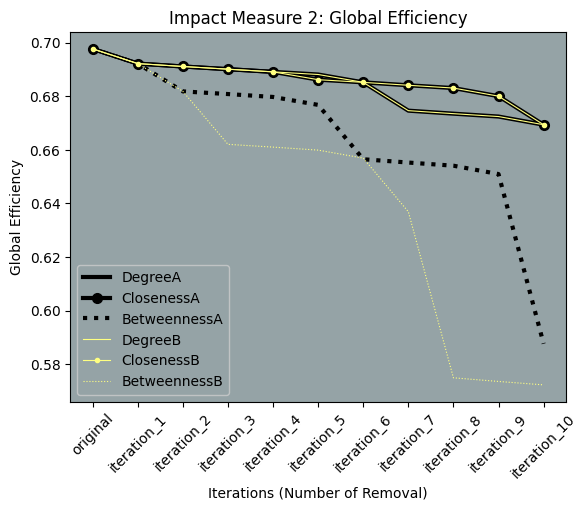

In [ ]:
import matplotlib.pyplot as plt

line_styles = ['-', '-', ':']
markerA = ['','o','']
markerB = ['','o','']
colors_A = ['black', 'black', 'black']
colors_B = ['#ffff81', '#ffff81', '#ffff81']
line_widthsA = [3, 3, 3]
line_widthsB = [0.8, 0.8, 0.8]

fig, ax = plt.subplots()
#ax.set_facecolor('#758da3')

ax.set_facecolor('#95a3a6')
# Plot the lines for ClusteringA
for i, col in enumerate(['DegreeA', 'ClosenessA', 'BetweennessA']):
    ax.plot(EfficiencyA['iteration'], EfficiencyA[col], linestyle=line_styles[i], color=colors_A[i], linewidth=line_widthsA[i], label=col,marker=markerA[i],markersize=7)

# Plot the lines for ClusteringB
for i, col in enumerate(['DegreeB', 'ClosenessB', 'BetweennessB']):
    ax.plot(EfficiencyB['iteration'], EfficiencyB[col], linestyle=line_styles[i], color=colors_B[i], linewidth=line_widthsB[i], label=col,marker=markerB[i],markersize=3)

ax.set_xlabel("Iterations (Number of Removal)")
ax.set_ylabel("Global Efficiency")
ax.set_title("Impact Measure 2: Global Efficiency")

plt.xticks(rotation=45)

legend = ax.legend()
legend.get_frame().set_facecolor('#95a3a6')

plt.savefig('Efficiency.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
EfficiencyA.head(2)

,iteration,DegreeA,ClosenessA,BetweennessA
0,original,0.697697,0.697697,0.697697
1,iteration_1,0.692206,0.692206,0.692206


In [ ]:
EfficiencyB.head(2)

,iteration,DegreeB,ClosenessB,BetweennessB
0,original,0.697697,0.697697,0.697697
1,iteration_1,0.692206,0.692206,0.692206


In [ ]:
rate_of_fall_column1 = (EfficiencyA['DegreeA'].iloc[-1] - EfficiencyA['DegreeA'].iloc[0]) / EfficiencyA['DegreeA'].iloc[0]
rate_of_fall_column2 = (EfficiencyA['ClosenessA'].iloc[-1] - EfficiencyA['ClosenessA'].iloc[0]) / EfficiencyA['ClosenessA'].iloc[0]
rate_of_fall_column3 = (EfficiencyA['BetweennessA'].iloc[-1] - EfficiencyA['BetweennessA'].iloc[0]) / EfficiencyA['BetweennessA'].iloc[0]

rate_of_fall_column4 = (EfficiencyB['DegreeB'].iloc[-1] - EfficiencyB['DegreeB'].iloc[0]) / EfficiencyB['DegreeB'].iloc[0]
rate_of_fall_column5 = (EfficiencyB['ClosenessB'].iloc[-1] - EfficiencyB['ClosenessB'].iloc[0]) / EfficiencyB['ClosenessB'].iloc[0]
rate_of_fall_column6 = (EfficiencyB['BetweennessB'].iloc[-1] - EfficiencyB['BetweennessB'].iloc[0]) / EfficiencyB['BetweennessB'].iloc[0]

In [ ]:
efficiency_rate = (rate_of_fall_column1 + rate_of_fall_column2 + rate_of_fall_column3 + rate_of_fall_column4 + rate_of_fall_column5 + rate_of_fall_column6) / 6
efficiency_rate

-0.08331142135462456

# II. Flows: weighted network
G_W = G_Weighted.copy()

In [ ]:
london_flows_nor = london_flows.copy()
london_flows_nor['flows'] = london_flows_nor['flows'].replace(0, 0.001) #把0替换成0.001
london_flows_nor['v_flows'] = london_flows_nor['flows'].apply(lambda x: 1 / x) #转置
london_flows_nor.head(2)

,station_origin,station_destination,flows,population,jobs,distance,v_flows
0,Abbey Road,Bank and Monument,0.001,599,78549,8131.525097,1000.0
1,Abbey Road,Beckton,1.000,599,442,8510.121774,1.0


In [ ]:
G_Weighted = nx.from_pandas_edgelist(london_flows_nor, source='station_origin', target='station_destination', edge_attr=['v_flows','flows']) #转好放进去的
print(f'Number of connected components:{nx.number_connected_components(G_Weighted)}')
print(G_Weighted.number_of_nodes())
print(G_Weighted.number_of_edges())
print(list(G_Weighted.edges(data = True))[0:5])
print(list(G_Weighted.nodes(data = True))[0:1])
#v_flows = {(e1, e2): round(1./flows, 7) if flows != 0 else flows for e1, e2, flows in G_W.edges(data='flows')}
#nx.set_edge_attributes(G_W, v_flows, 'v_flows')

Number of connected components:1
399
31718
[('Abbey Road', 'Bank and Monument', {'v_flows': 1000.0, 'flows': 0.001}), ('Abbey Road', 'Beckton', {'v_flows': 1000.0, 'flows': 0.001}), ('Abbey Road', 'Blackwall', {'v_flows': 1000.0, 'flows': 0.001}), ('Abbey Road', 'Canary Wharf', {'v_flows': 0.5, 'flows': 2.0}), ('Abbey Road', 'Canning Town', {'v_flows': 0.2, 'flows': 5.0})]
[('Abbey Road', {})]


In [ ]:
G_W = G_Weighted.copy()

# degree
degree_w=nx.degree(G_W)
nx.set_node_attributes(G_W,dict(degree_w),'Degree_W')
degree_w_dict = dict(degree_w)

# normalised
degree_normalised_w =nx.degree_centrality(G_W)
nx.set_node_attributes(G_W,degree_normalised_w,'Degree_Normalised_W')

#closeness
closeness_w=nx.closeness_centrality(G_W, distance='v_flows')
nx.set_node_attributes(G_W,closeness_w,'Closeness_W')

#betweenness
betweenness_w=nx.betweenness_centrality(G_W,weight='v_flows', normalized=False)
nx.set_node_attributes(G_W,betweenness_w,'Betweenness_W')

# Sort the dictionaries by their values in descending order
degree_w_sorted = sorted(degree_w_dict.items(), key=lambda x: x[1], reverse=True)[:10]
degree_normalised_w_sorted = sorted(degree_normalised_w.items(), key=lambda x: x[1], reverse=True)[:10]
closeness_w_sorted = sorted(closeness_w.items(), key=lambda x: x[1], reverse=True)[:10]
betweenness_w_sorted = sorted(betweenness_w.items(), key=lambda x: x[1], reverse=True)[:10]

# Create DataFrames for each centrality measure
degree_w_df = pd.DataFrame(degree_w_sorted, columns=['node', 'degree_w'])
degree_normalised_w_df = pd.DataFrame(degree_normalised_w_sorted, columns=['node', 'degree_normalised_w'])
closeness_w_df = pd.DataFrame(closeness_w_sorted, columns=['node', 'closeness_w'])
betweenness_w_df = pd.DataFrame(betweenness_w_sorted, columns=['node', 'betweenness_w'])

# Merge the DataFrames on the node names
merged_df = pd.concat([degree_w_df, degree_normalised_w_df, closeness_w_df, betweenness_w_df], axis=1)

# Save the merged DataFrame to an Excel file
merged_df.to_excel('top_10_centralities.xlsx', index=False)
merged_df

,node,degree_w,node,degree_normalised_w,node,closeness_w,node,betweenness_w
0,Stratford,367,Stratford,0.922111,Waterloo,0.396916,Waterloo,38082.0
1,Highbury & Islington,321,Highbury & Islington,0.806533,Canary Wharf,0.396913,Bank and Monument,33506.0
2,Whitechapel,311,Whitechapel,0.781407,Bank and Monument,0.396912,Canary Wharf,32176.0
3,West Brompton,309,West Brompton,0.776382,Stratford,0.396906,Stratford,31474.0
4,Canary Wharf,307,Canary Wharf,0.771357,Liverpool Street,0.396898,Liverpool Street,20611.0
5,Canada Water,307,Canada Water,0.771357,London Bridge,0.396889,Oxford Circus,12832.0
6,Liverpool Street,306,Liverpool Street,0.768844,Oxford Circus,0.396877,Hammersmith,9379.0
7,Bank and Monument,305,Bank and Monument,0.766332,Farringdon,0.396870,Farringdon,9080.0
8,Richmond,305,Richmond,0.766332,Victoria,0.396858,Victoria,8629.0
9,Canning Town,304,Canning Town,0.763819,King's Cross St. Pancras,0.396858,Canada Water,6851.0


## Weighted Centrality Measures

In [ ]:
G_W1 = G_Weighted.copy()

In [ ]:
clustering_coefficients = nx.clustering(G_W1, weight='flows')

# Calculate the average clustering coefficient
average_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
average_clustering_coefficient

0.0005527684334161219

In [ ]:
new_columns_data = {}

for column_name, column_data in merged_df.iteritems():

    while column_name in new_columns_data:
        column_name += "_"
    new_columns_data[column_name] = column_data

new_merged_df = pd.DataFrame(new_columns_data)
new_merged_df

<ipython-input-123-1412272b19b5>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in merged_df.iteritems():


,node,degree_w,node_,degree_normalised_w,node__,closeness_w,node___,betweenness_w
0,Stratford,367,Stratford,0.922111,Waterloo,0.396916,Waterloo,38082.0
1,Highbury & Islington,321,Highbury & Islington,0.806533,Canary Wharf,0.396913,Bank and Monument,33506.0
2,Whitechapel,311,Whitechapel,0.781407,Bank and Monument,0.396912,Canary Wharf,32176.0
3,West Brompton,309,West Brompton,0.776382,Stratford,0.396906,Stratford,31474.0
4,Canary Wharf,307,Canary Wharf,0.771357,Liverpool Street,0.396898,Liverpool Street,20611.0
5,Canada Water,307,Canada Water,0.771357,London Bridge,0.396889,Oxford Circus,12832.0
6,Liverpool Street,306,Liverpool Street,0.768844,Oxford Circus,0.396877,Hammersmith,9379.0
7,Bank and Monument,305,Bank and Monument,0.766332,Farringdon,0.396870,Farringdon,9080.0
8,Richmond,305,Richmond,0.766332,Victoria,0.396858,Victoria,8629.0
9,Canning Town,304,Canning Town,0.763819,King's Cross St. Pancras,0.396858,Canada Water,6851.0


In [ ]:
new_merged_df.head(2)

,node,degree_w,node_,degree_normalised_w,node__,closeness_w,node___,betweenness_w
0,Stratford,367,Stratford,0.922111,Waterloo,0.396916,Waterloo,38082.0
1,Highbury & Islington,321,Highbury & Islington,0.806533,Canary Wharf,0.396913,Bank and Monument,33506.0


In [ ]:
#I
df_removed_nodes_2
key_column = 'Clustering Betweenness B'
value_column = 'betweenness_centrality'

# Create the dictionary using dictionary comprehension and zip
dict_1 = {key: value for key, value in zip(df_removed_nodes_2[key_column], df_removed_nodes_2[value_column])}
dict_1

{'Stratford': 7785.9670729828695,
 'Liverpool Street': 5535.0774415213555,
 'Upminster': 4985.163205181417,
 'Bank and Monument': 2963.750509185267,
 'Canary Wharf': 3956.42371549968,
 'Canning Town': 5991.716826491407,
 'West Ham': 10391.83241292199,
 'Shadwell': 13236.802199143656,
 'Highbury & Islington': 1939.2826731897865,
 'Whitechapel': 1842.3204110006106}

In [ ]:
#2.1
key_column = 'node_'
value_column = 'degree_normalised_w'

# Create the dictionary using dictionary comprehension and zip
dict_degree = {key: value for key, value in zip(new_merged_df[key_column], new_merged_df[value_column])}
dict_degree

In [ ]:
#2.2
key_column = 'node__'
value_column = 'closeness_w'

# Create the dictionary using dictionary comprehension and zip
dict_closeness = {key: value for key, value in zip(new_merged_df[key_column], new_merged_df[value_column])}
dict_closeness

{'Waterloo': 0.39691577408688783,
 'Canary Wharf': 0.39691332602484997,
 'Bank and Monument': 0.39691241834697627,
 'Stratford': 0.3969055840966435,
 'Liverpool Street': 0.39689776767786555,
 'London Bridge': 0.39688855030279946,
 'Oxford Circus': 0.39687714604444707,
 'Farringdon': 0.39686956936581497,
 'Victoria': 0.3968578799709398,
 "King's Cross St. Pancras": 0.39685771165474426}

In [ ]:
#2.3
key_column = 'node___'
value_column = 'betweenness_w'

# Create the dictionary using dictionary comprehension and zip
dict_betweenness = {key: value for key, value in zip(new_merged_df[key_column], new_merged_df[value_column])}
dict_betweenness

{'Waterloo': 38082.0,
 'Bank and Monument': 33506.0,
 'Canary Wharf': 32176.0,
 'Stratford': 31474.0,
 'Liverpool Street': 20611.0,
 'Oxford Circus': 12832.0,
 'Hammersmith': 9379.0,
 'Farringdon': 9080.0,
 'Victoria': 8629.0,
 'Canada Water': 6851.0}

In [ ]:
#clustering!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from operator import itemgetter

# Assuming G1 is your networkx graph and degree_normalised is your dictionary of normalized degree values for the nodes
#G1=G_topological.copy()
G_W1 = G_Weighted.copy()
#clustering_coefficients = nx.clustering(G_W1, weight='flows')
def calculate_clustering_coefficients(G, sorted_nodes):
    # Calculate the original average clustering coefficient
    c = nx.clustering(G,weight='flows')
    c_avg = sum(c.values()) / len(c)

    # Initialize a list to store the results
    results = []

    # Add the original average clustering coefficient to the results list
    results.append(('original', c_avg))

    # Iteratively remove nodes from the sorted list
    for idx, node in enumerate(sorted_nodes):
        G.remove_node(node)

        # Calculate the new average clustering coefficient
        c = nx.clustering(G,weight='flows')
        c_avg = sum(c.values()) / len(c)

        # Add the new average clustering coefficient to the results list
        results.append((f'iteration_{idx + 1}', c_avg))

    return results

# Define your three different sorted_ten lists
w_sorted_ten_1 = [e for e, v in sorted(dict_1.items(), key=itemgetter(1), reverse=True)[:3]]
w_sorted_ten_2 = [e for e, v in sorted(dict_degree.items(), key=itemgetter(1), reverse=True)[:3]]
w_sorted_ten_3 = [e for e, v in sorted(dict_closeness.items(), key=itemgetter(1), reverse=True)[:3]]
w_sorted_ten_4 = [e for e, v in sorted(dict_betweenness.items(), key=itemgetter(1), reverse=True)[:3]]

# Call the function for each sorted_ten list and create DataFrames for each
G1_copy1 = G_W1.copy()
results_1 = calculate_clustering_coefficients(G1_copy1, w_sorted_ten_1)
df1 = pd.DataFrame(results_1, columns=['iteration', 'E1'])

G1_copy2 = G_W1.copy()
results_2 = calculate_clustering_coefficients(G1_copy2, w_sorted_ten_2)
df2 = pd.DataFrame(results_2, columns=['iteration', 'E2'])

G1_copy3 = G_W1.copy()
results_3 = calculate_clustering_coefficients(G1_copy3, w_sorted_ten_3)
df3 = pd.DataFrame(results_3, columns=['iteration', 'E3'])

G1_copy4 = G_W1.copy()
results_4 = calculate_clustering_coefficients(G1_copy4, w_sorted_ten_4)
df4 = pd.DataFrame(results_4, columns=['iteration', 'E4'])

# Merge the DataFrames
E_clustering = df1.merge(df2, on='iteration').merge(df3, on='iteration').merge(df4, on='iteration')
E_clustering.to_excel('E_clustering.xlsx')
# Display the merged DataFrame
E_clustering

,iteration,E1,E2,E3,E4
0,original,0.000553,0.000553,0.000553,0.000553
1,iteration_1,0.000546,0.000493,0.001236,0.001236
2,iteration_2,0.000547,0.000488,0.001184,0.001145
3,iteration_3,0.000486,0.000484,0.001096,0.001096


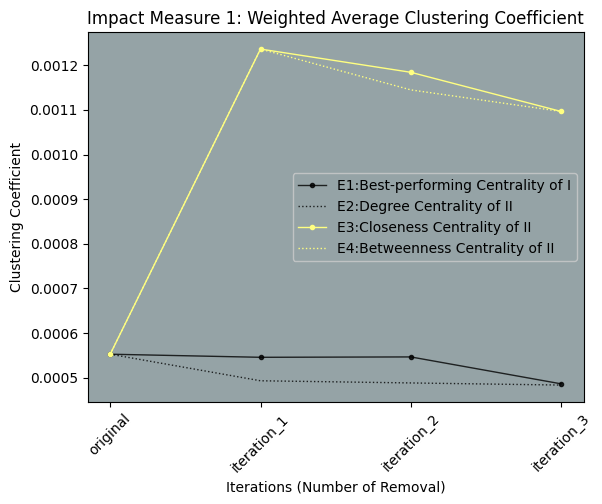

In [ ]:
import matplotlib.pyplot as plt

#line_styles1 = ['-']
line_styles = [':', '-', ':']
markerA = ['']
markerB = ['','o','']
colors_A = ['black']
colors_B = ['black', '#ffff81', '#ffff81']
alpha = [0.8,1,1]
line_widthsA = [1]
line_widthsB = [1, 1, 1]
label = ['E2:Degree Centrality of II','E3:Closeness Centrality of II','E4:Betweenness Centrality of II']

fig, ax = plt.subplots()
#ax.set_facecolor('#758da3')

ax.set_facecolor('#95a3a6')
# Plot the lines for 一个
ax.plot(E_clustering['iteration'],E_clustering['E1'],alpha=0.8,linestyle='-', color='black', linewidth=1, label='E1:Best-performing Centrality of I',markersize=3,marker='o')

# Plot the lines for 三个lp
for i, col in enumerate(['E2', 'E3', 'E4']):
    ax.plot(E_clustering['iteration'],E_clustering[col], alpha=alpha[i],linestyle=line_styles[i], color=colors_B[i], linewidth=line_widthsB[i], label=label[i],marker=markerB[i],markersize=3)

ax.set_xlabel("Iterations (Number of Removal)")
ax.set_ylabel("Clustering Coefficient")
ax.set_title("Impact Measure 1: Weighted Average Clustering Coefficient")

plt.xticks(rotation=45)

legend = ax.legend()
legend.get_frame().set_facecolor('#95a3a6')

plt.savefig('E_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

**Modularity**

In [ ]:
G_W2 = G_Weighted.copy()

In [ ]:
import networkx as nx
import networkx.algorithms
import community as community_louvain
from networkx.algorithms.community import greedy_modularity_communities, modularity
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity
import itertools
from networkx.algorithms.community import greedy_modularity_communities

communities_fg = greedy_modularity_communities(G_W2,weight='flows')
modularity_test = modularity(G_W2, communities_fg, weight='flows')
#print(f"modularity of fast-greedy: {modularity(GW_2, communities_fg, weight='flows')}")
# Calculate the global modularity of the weighted network
#modularity = nx.algorithms.community.modularity(G_2, communities, weight='flows')
modularity_test
#print("Global modularity:", modularity)

0.3157728818923095

In [ ]:
#modularity!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from operator import itemgetter

# Assuming G1 is your networkx graph and degree_normalised is your dictionary of normalized degree values for the nodes
#G1=G_topological.copy()
G_W2 = G_Weighted.copy()
#clustering_coefficients = nx.clustering(G_W1, weight='flows')
def calculate_modularity(G, sorted_nodes):
    # Calculate the original average clustering coefficient
    communities_fg1 = greedy_modularity_communities(G,weight='flows')
    modularity1 = modularity(G, communities_fg1, weight='flows')

    # Initialize a list to store the results
    results = []

    # Add the original average clustering coefficient to the results list
    results.append(('original', modularity1))

    # Iteratively remove nodes from the sorted list
    for idx, node in enumerate(sorted_nodes):
        G.remove_node(node)

        # Calculate the new average clustering coefficient
        communities_fg1 = greedy_modularity_communities(G,weight='flows')
        modularity1 = modularity(G, communities_fg1, weight='flows')

        # Add the new average clustering coefficient to the results list
        results.append((f'iteration_{idx + 1}', modularity1))

    return results

# Define your three different sorted_ten lists
w_sorted_ten_1 = [e for e, v in sorted(dict_1.items(), key=itemgetter(1), reverse=True)[:3]]
w_sorted_ten_2 = [e for e, v in sorted(dict_degree.items(), key=itemgetter(1), reverse=True)[:3]]
w_sorted_ten_3 = [e for e, v in sorted(dict_closeness.items(), key=itemgetter(1), reverse=True)[:3]]
w_sorted_ten_4 = [e for e, v in sorted(dict_betweenness.items(), key=itemgetter(1), reverse=True)[:3]]

# Call the function for each sorted_ten list and create DataFrames for each
G1_copy1 = G_W2.copy()
results_1 = calculate_modularity(G1_copy1, w_sorted_ten_1)
df1 = pd.DataFrame(results_1, columns=['iteration', 'E1'])

G1_copy2 = G_W2.copy()
results_2 = calculate_modularity(G1_copy2, w_sorted_ten_2)
df2 = pd.DataFrame(results_2, columns=['iteration', 'E2'])

G1_copy3 = G_W2.copy()
results_3 = calculate_modularity(G1_copy3, w_sorted_ten_3)
df3 = pd.DataFrame(results_3, columns=['iteration', 'E3'])

G1_copy4 = G_W2.copy()
results_4 = calculate_modularity(G1_copy4, w_sorted_ten_4)
df4 = pd.DataFrame(results_4, columns=['iteration', 'E4'])

# Merge the DataFrames
E_modularity = df1.merge(df2, on='iteration').merge(df3, on='iteration').merge(df4, on='iteration')
E_modularity.to_excel('E_modularity.xlsx')
# Display the merged DataFrame
E_modularity

,iteration,E1,E2,E3,E4
0,original,0.315773,0.315773,0.315773,0.315773
1,iteration_1,0.314596,0.327266,0.313452,0.313452
2,iteration_2,0.317328,0.328756,0.325930,0.335777
3,iteration_3,0.328496,0.330828,0.332339,0.332339


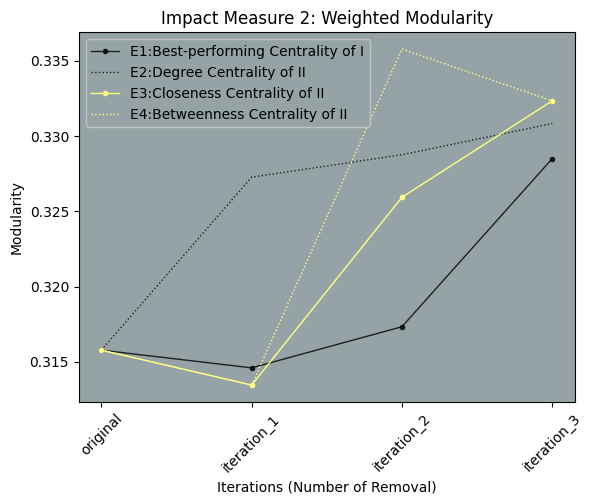

In [ ]:
import matplotlib.pyplot as plt

#line_styles1 = ['-']
line_styles = [':', '-', ':']
markerA = ['']
markerB = ['','o','']
colors_A = ['black']
colors_B = ['black', '#ffff81', '#ffff81']
alpha=[0.8,1,1]
line_widthsA = [1]
line_widthsB = [1, 1, 1]
label = ['E2:Degree Centrality of II','E3:Closeness Centrality of II','E4:Betweenness Centrality of II']

fig, ax = plt.subplots()
#ax.set_facecolor('#758da3')

ax.set_facecolor('#95a3a6')
# Plot the lines for 一个
ax.plot(E_modularity['iteration'],E_modularity['E1'],alpha=0.8,linestyle='-', color='black', linewidth=1, label='E1:Best-performing Centrality of I',markersize=3,marker='o')

# Plot the lines for 三个
for i, col in enumerate(['E2', 'E3', 'E4']):
    ax.plot(E_modularity['iteration'],E_modularity[col],alpha=alpha[i] ,linestyle=line_styles[i], color=colors_B[i], linewidth=line_widthsB[i], label=label[i],marker=markerB[i],markersize=3)

ax.set_xlabel("Iterations (Number of Removal)")
ax.set_ylabel("Modularity")
ax.set_title("Impact Measure 2: Weighted Modularity")

plt.xticks(rotation=45)

legend = ax.legend()
legend.get_frame().set_facecolor('#95a3a6')

plt.savefig('E_modularity.png', dpi=300, bbox_inches='tight')
plt.show()